# NOISE EDA (Exploratory data analysis)

The lightwave viewer on physionet.org does not show clearly how the noise annotations correspond to the actual ecg,
so in order to process separate the clean signals from the noise, a visual exploration on the first file with noise
was made


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.rcParams["figure.figsize"] = (10,7)

ann_data_dir = 'data\physionet_dbs\cudb\\annotations_systemized'
samp_data_dir = 'data\physionet_dbs\cudb\samples'
plots_save_dir = 'cudb_noise_plots'
if not os.path.exists(plots_save_dir):
    os.makedirs(plots_save_dir)

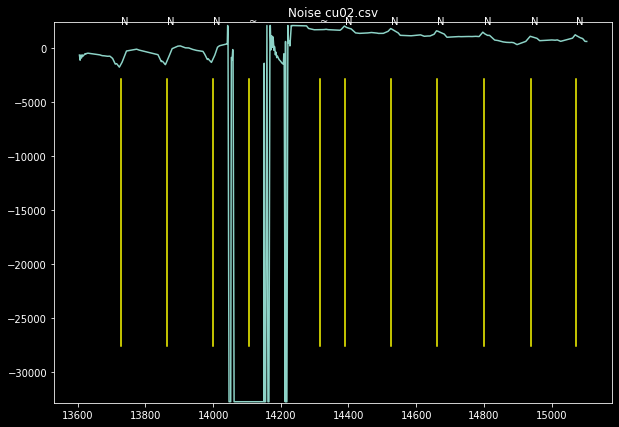

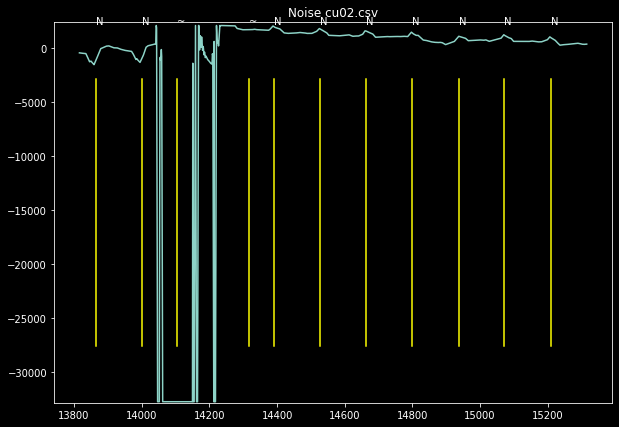

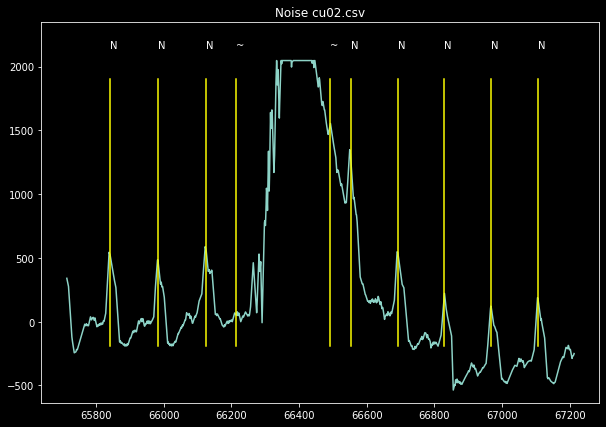

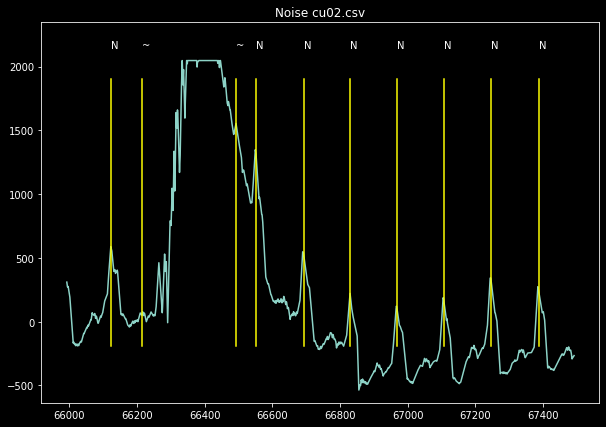

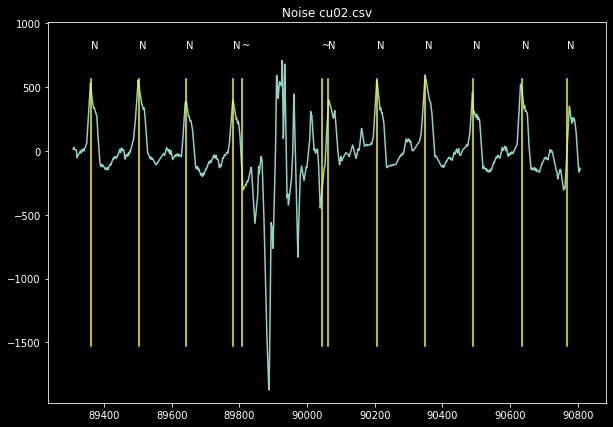

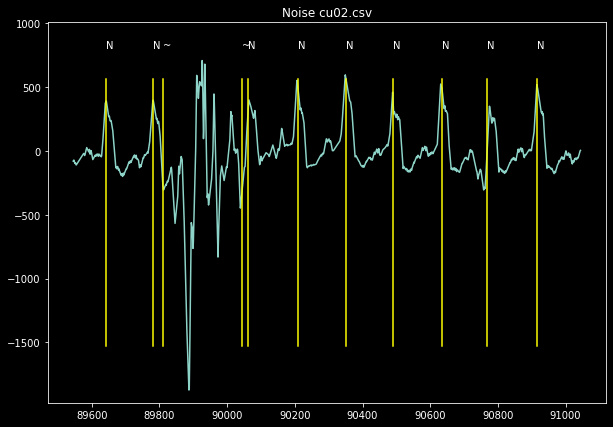

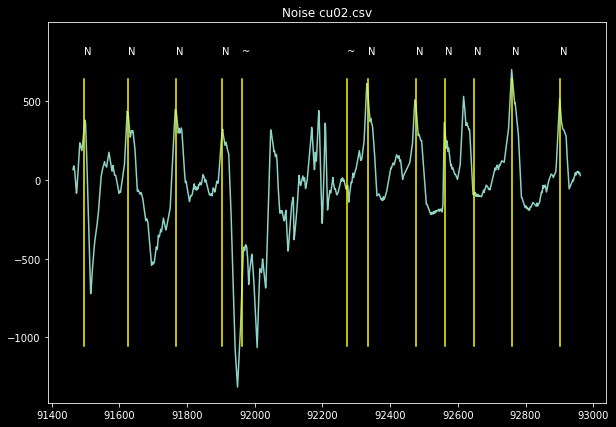

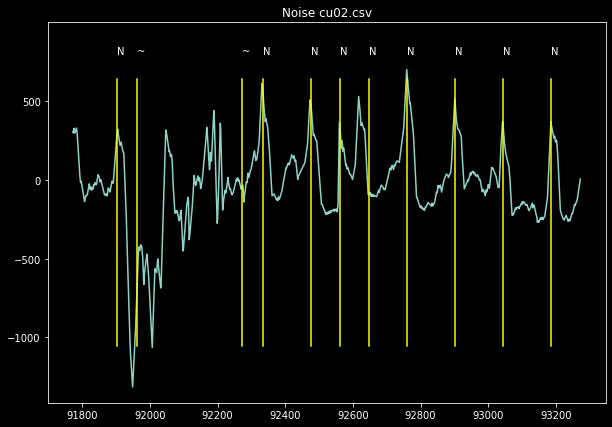

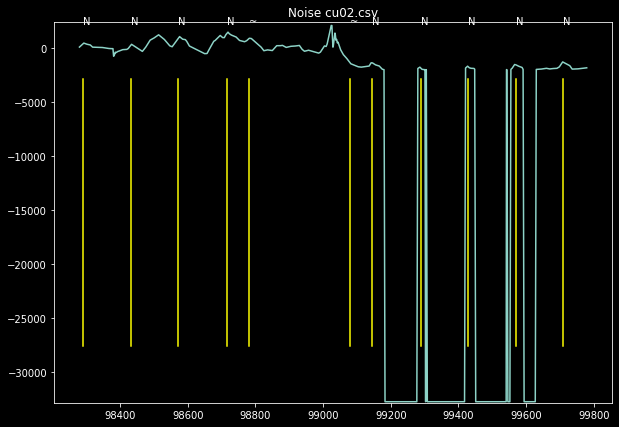

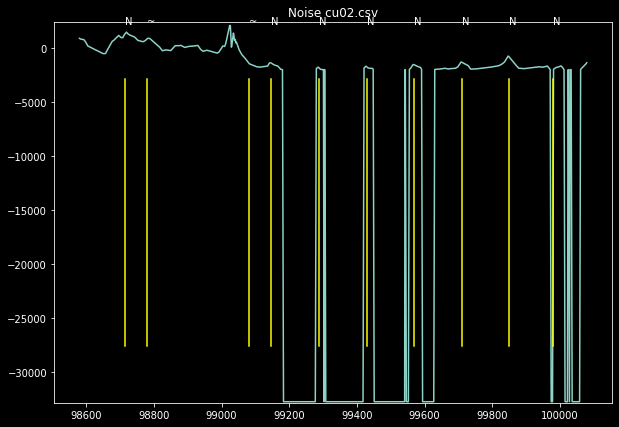

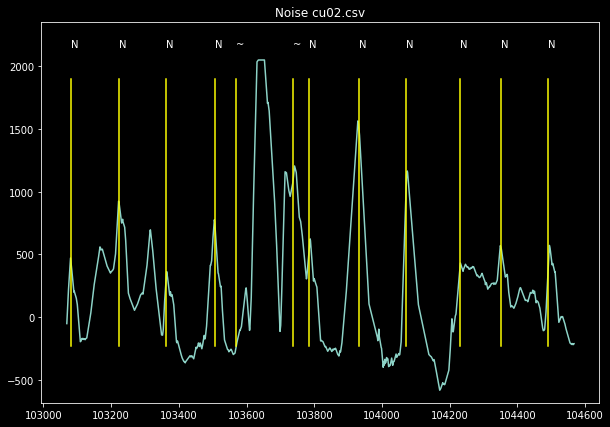

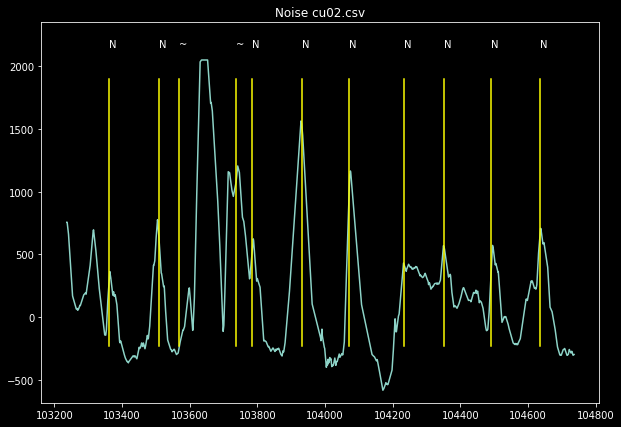

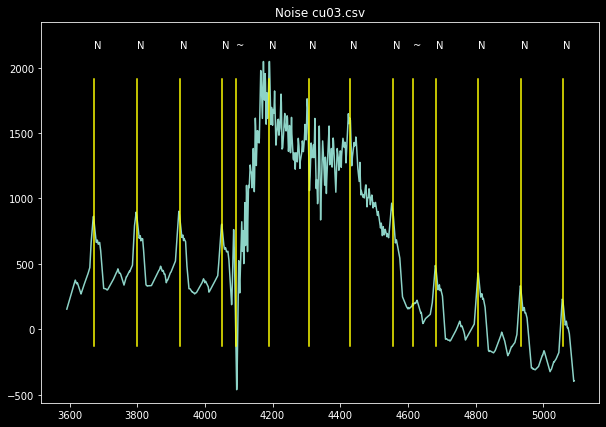

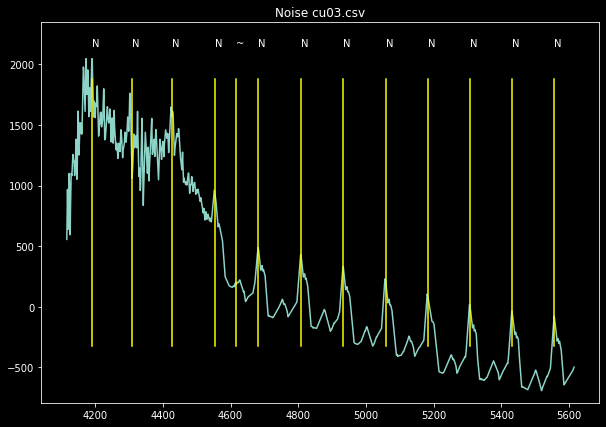

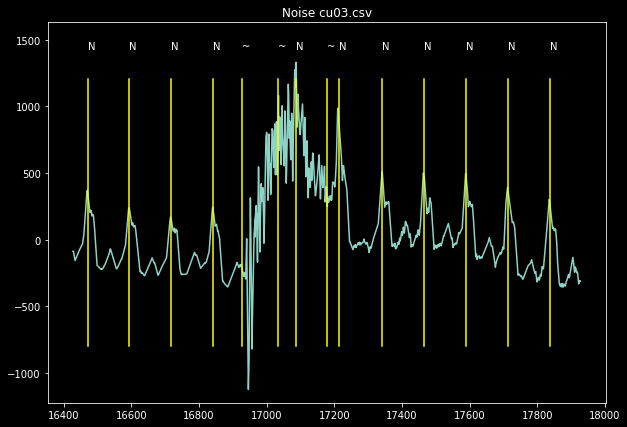

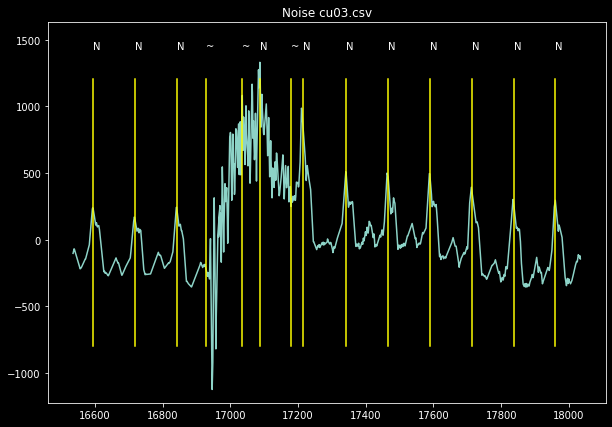

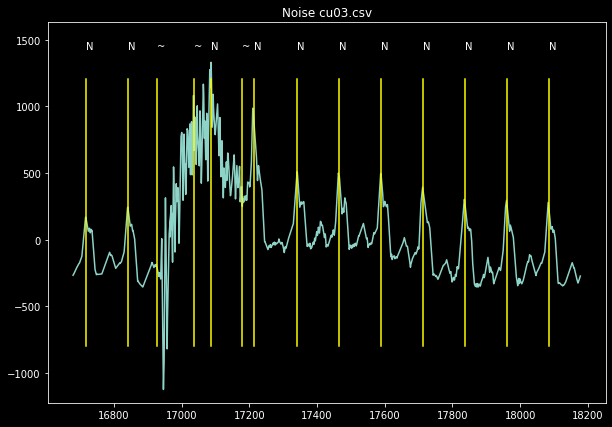

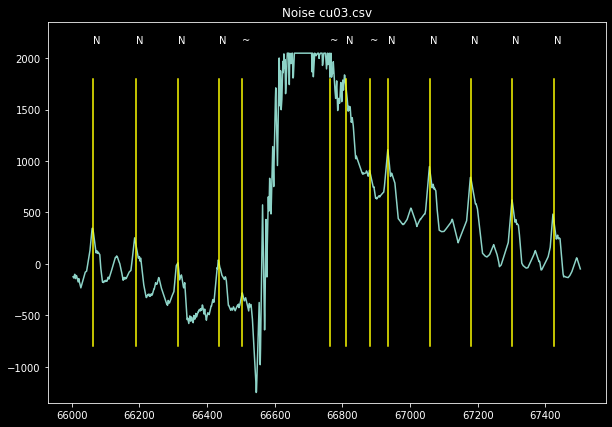

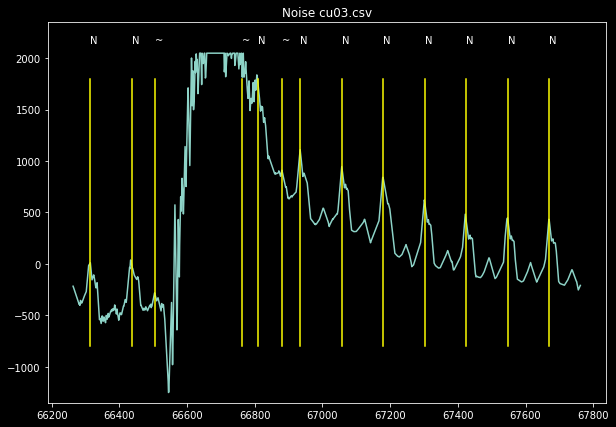

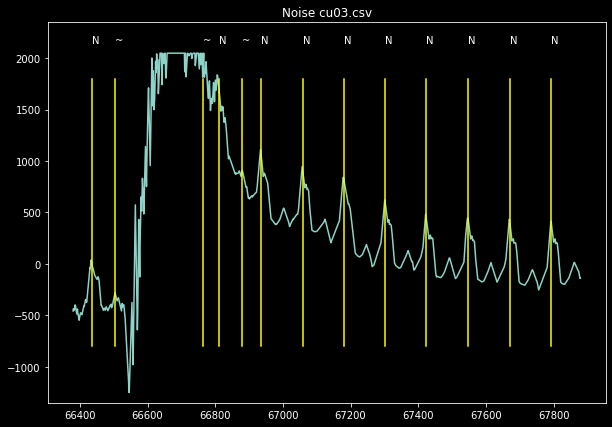

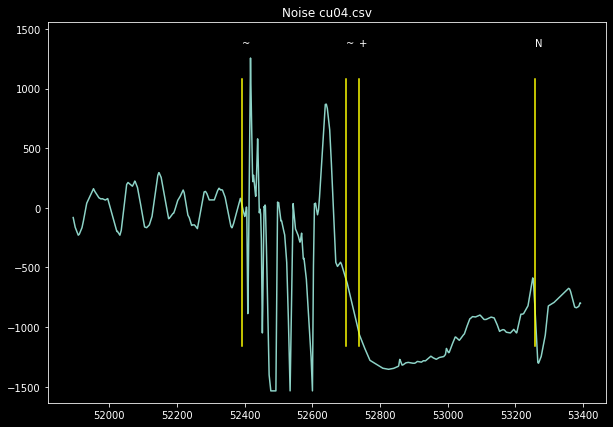

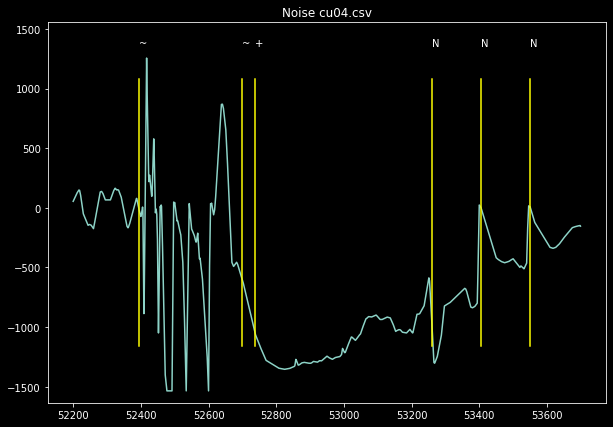

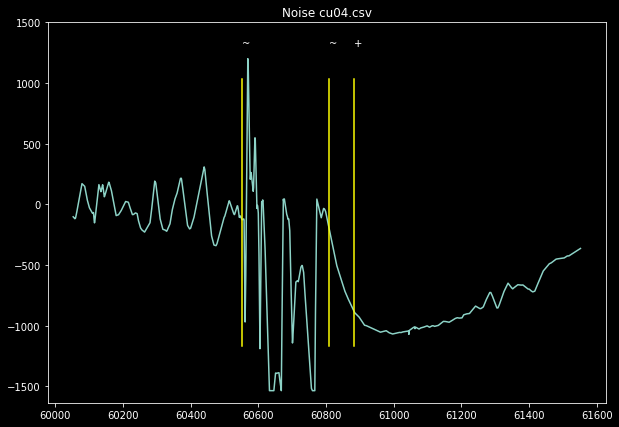

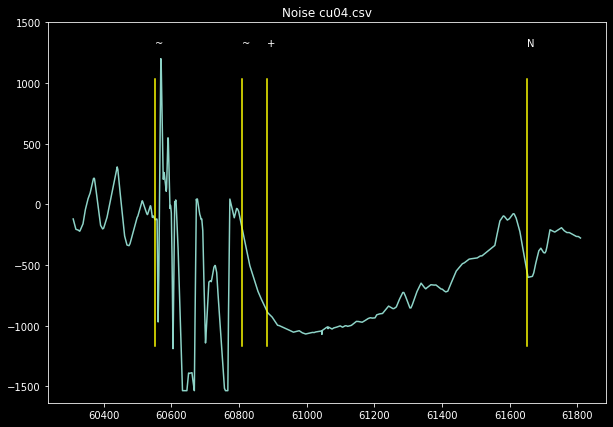

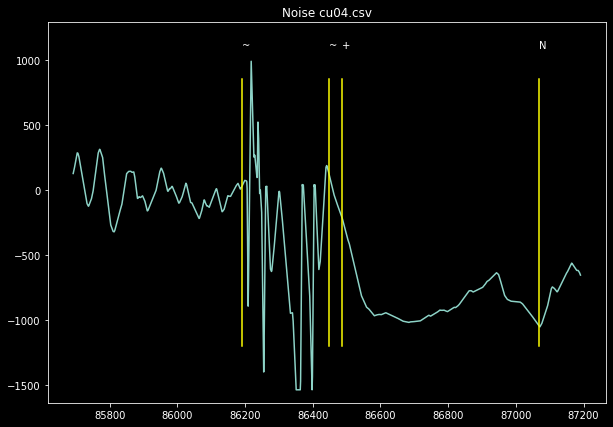

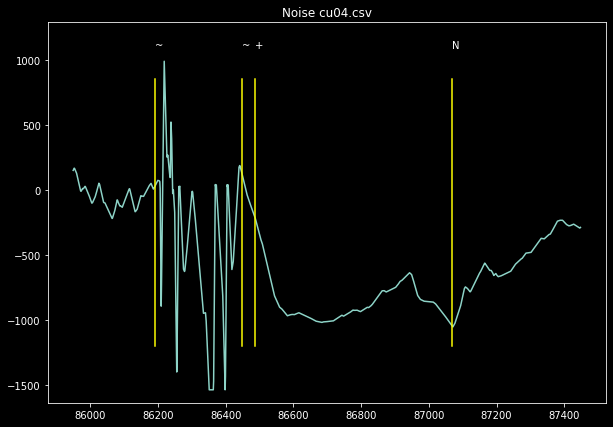

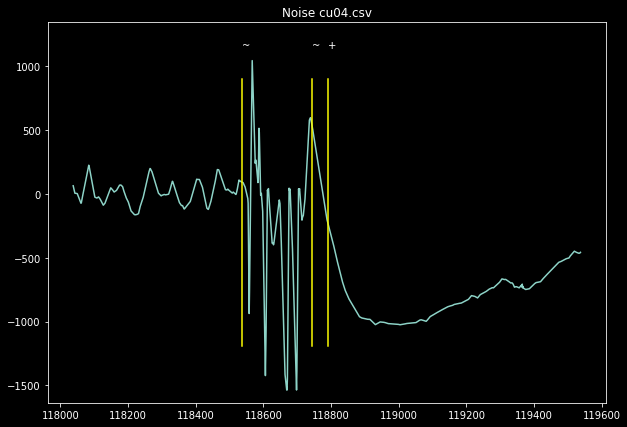

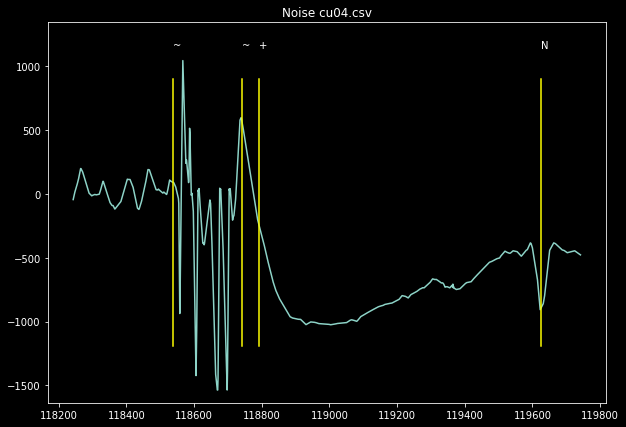

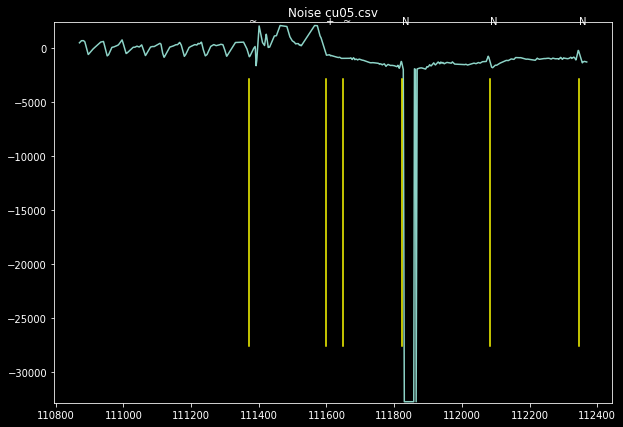

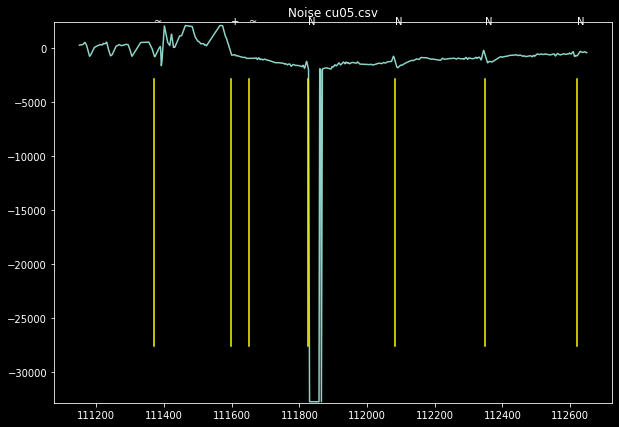

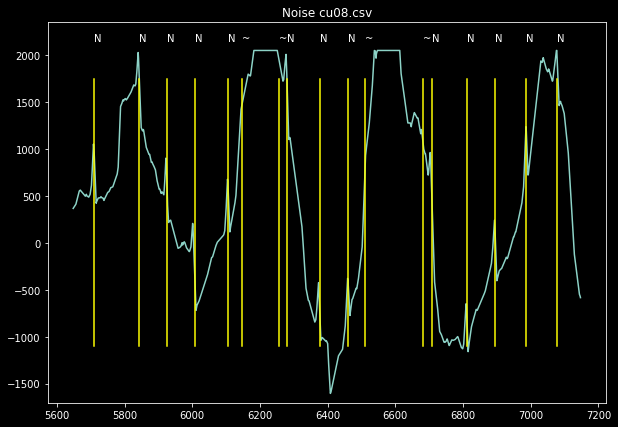

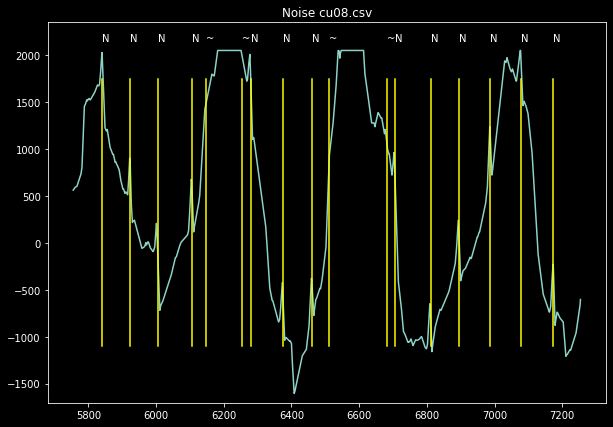

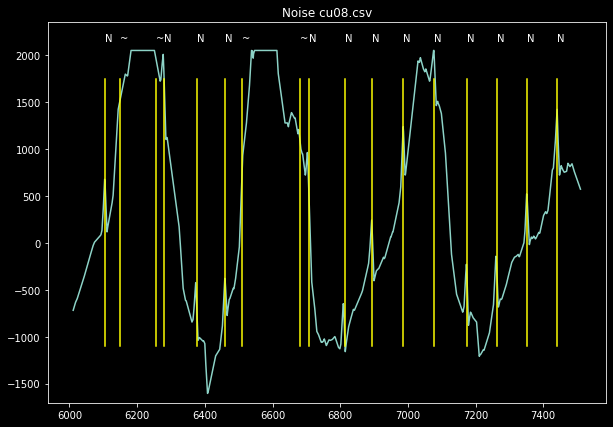

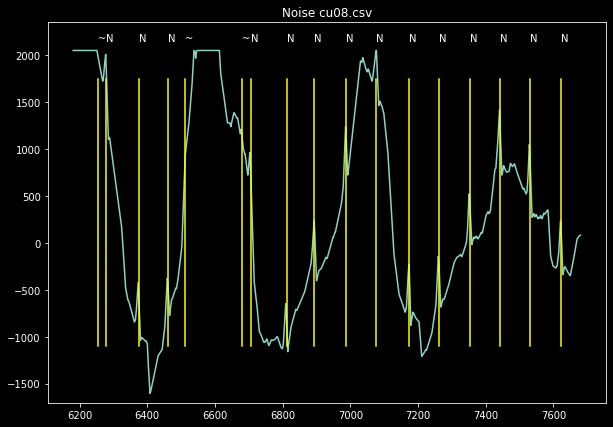

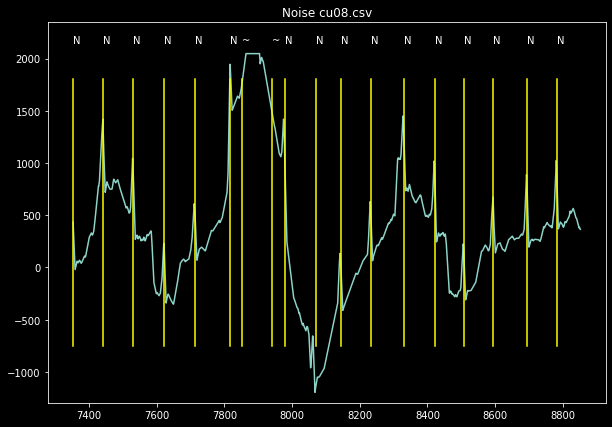

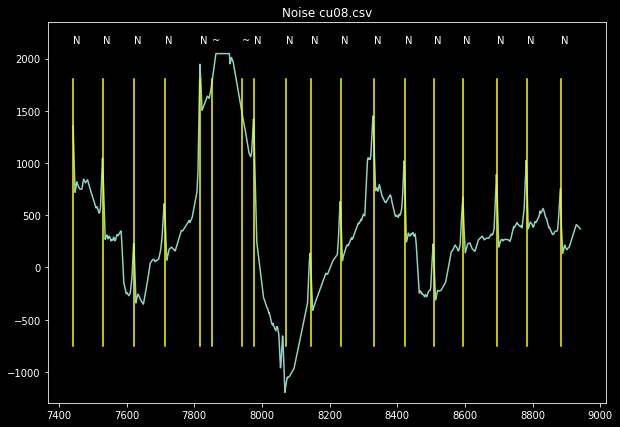

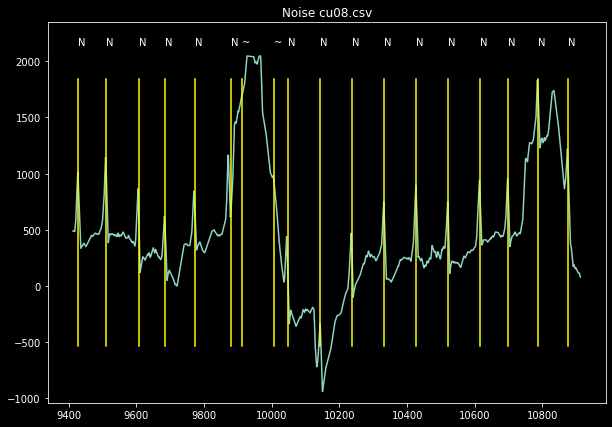

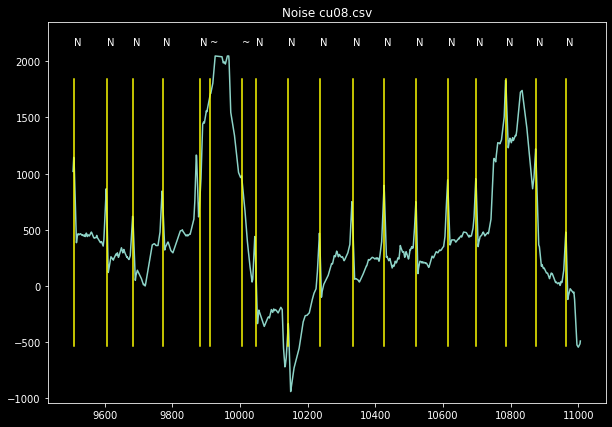

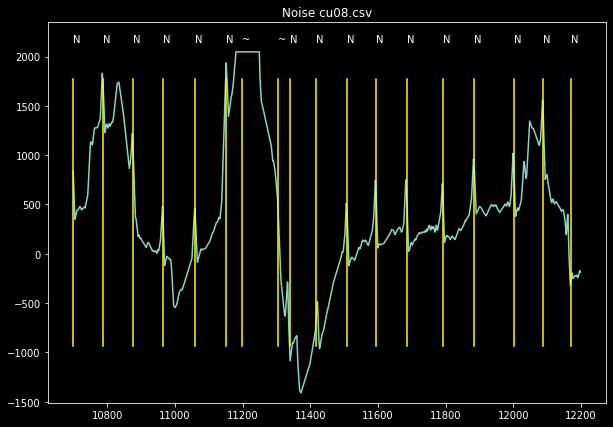

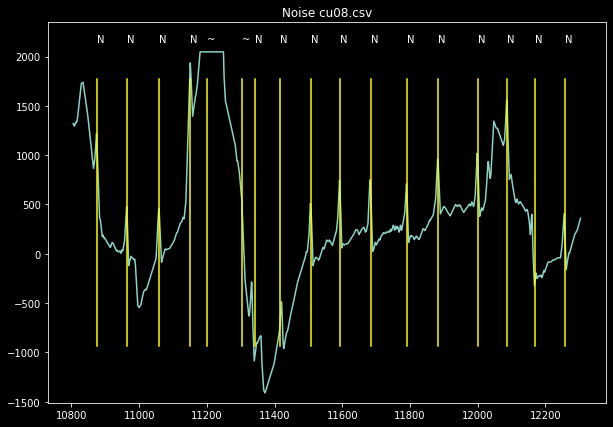

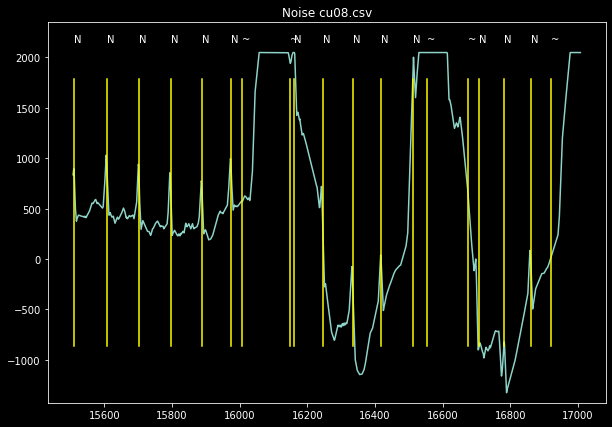

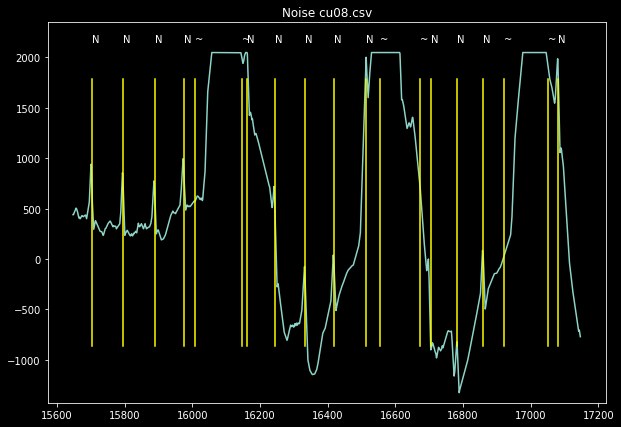

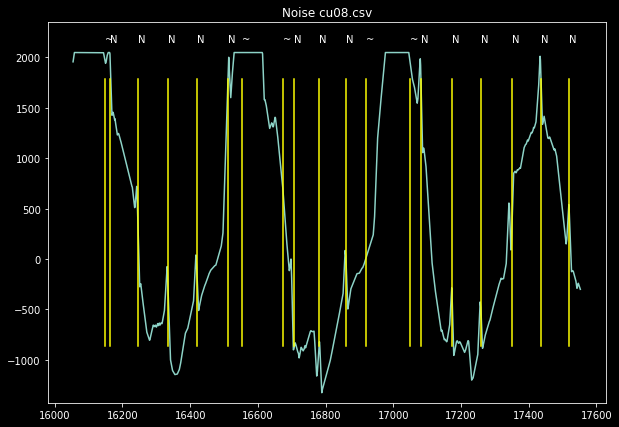

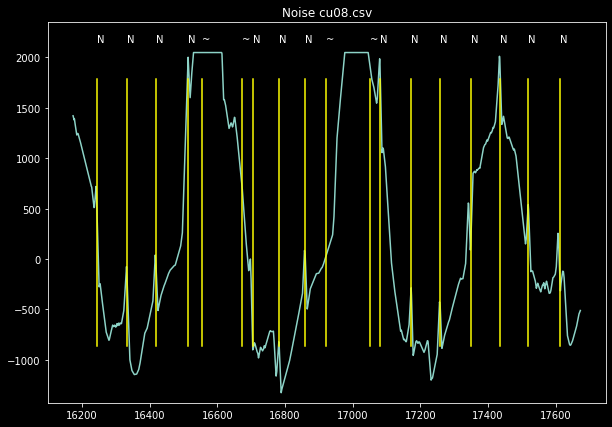

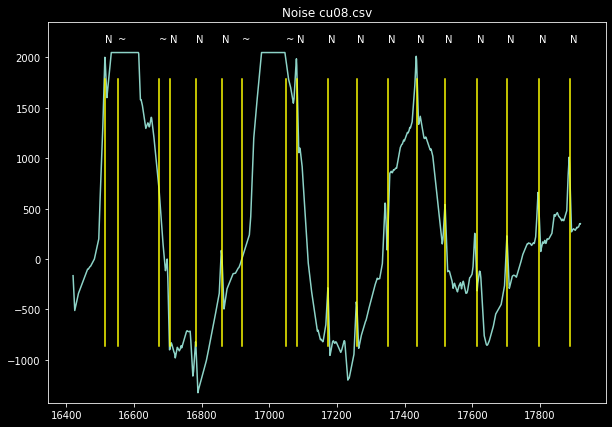

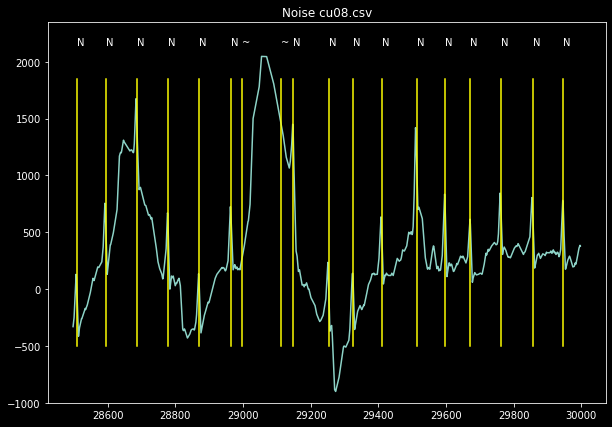

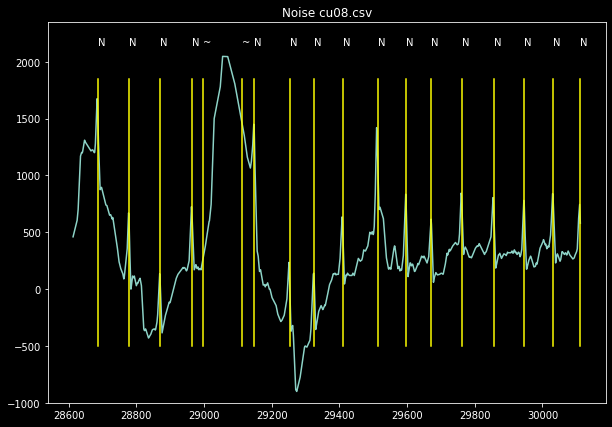

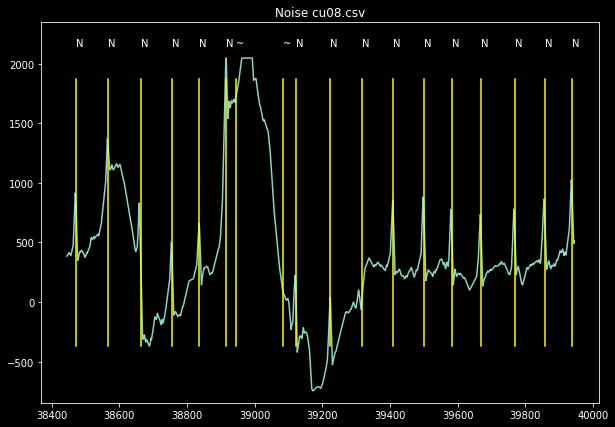

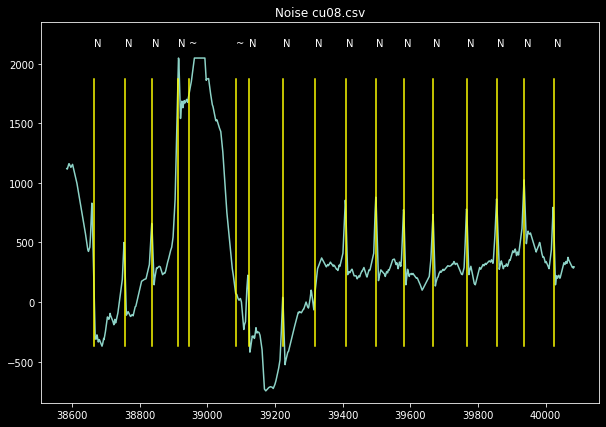

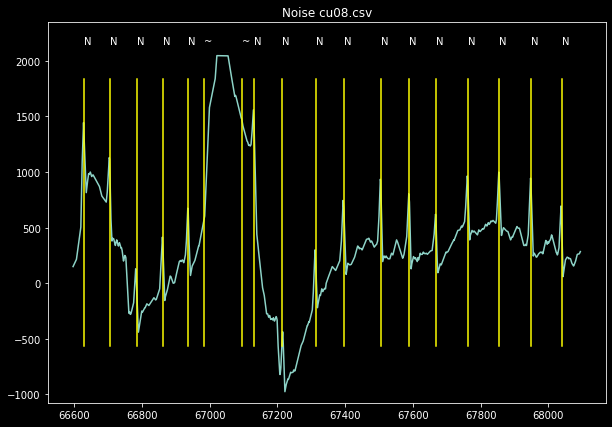

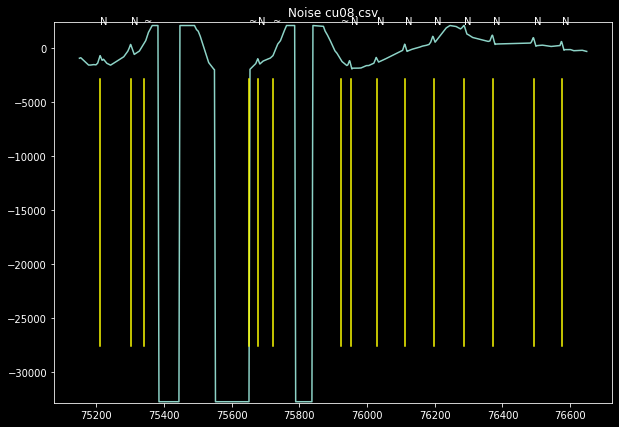

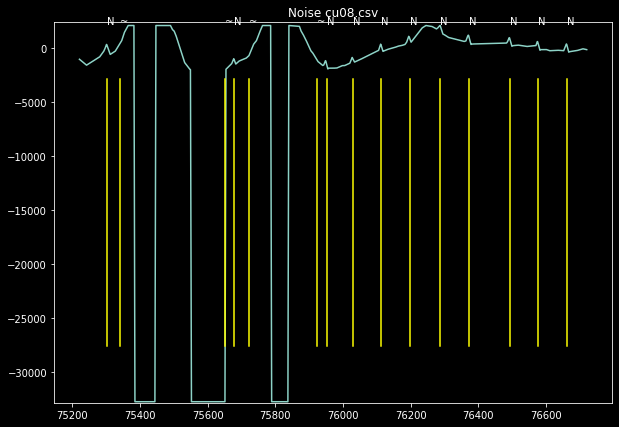

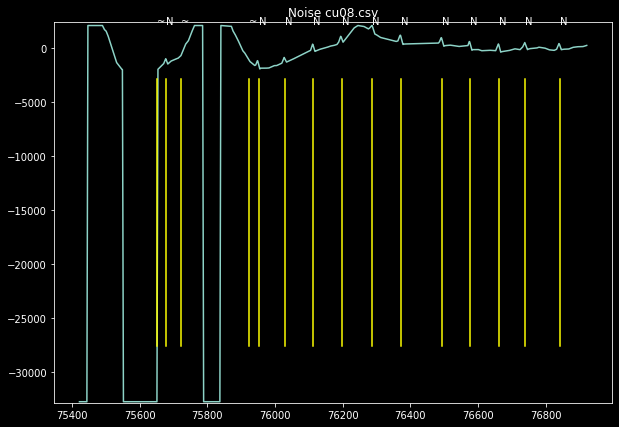

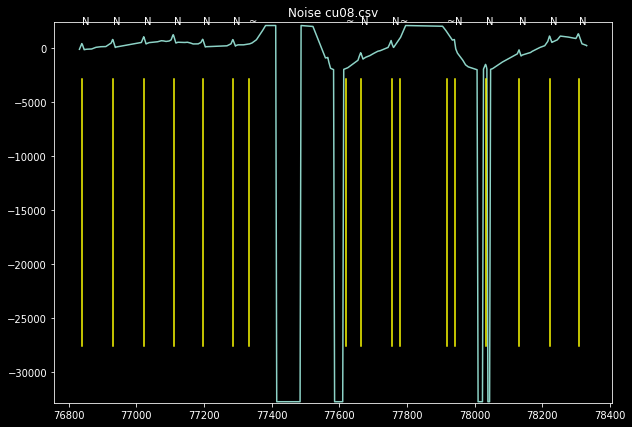

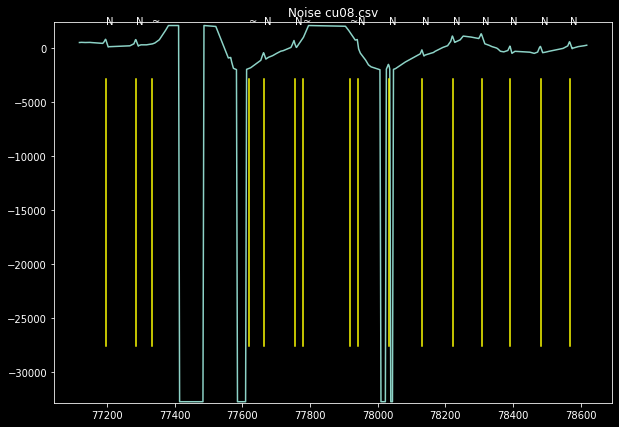

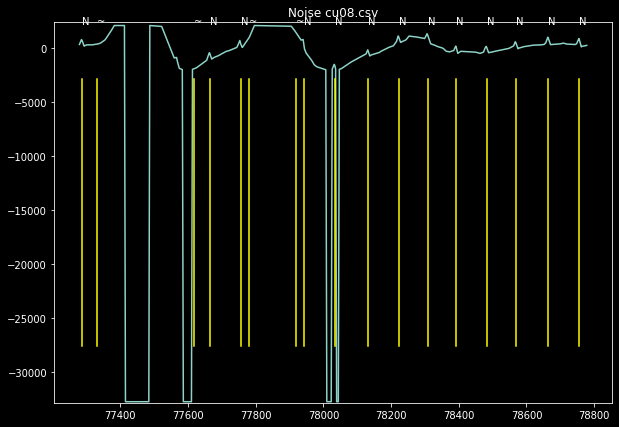

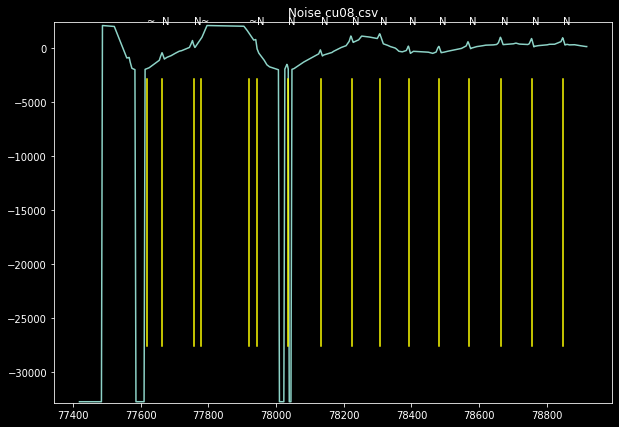

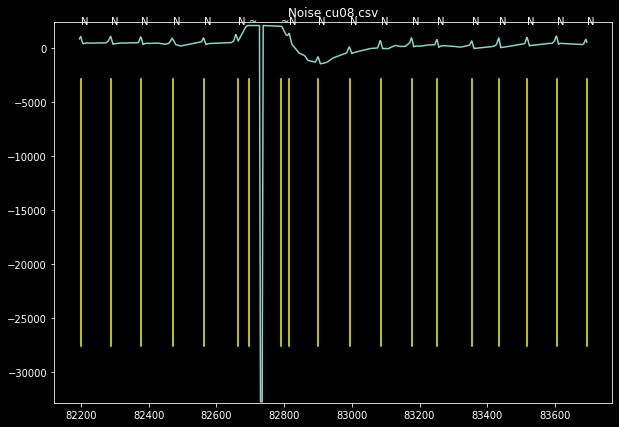

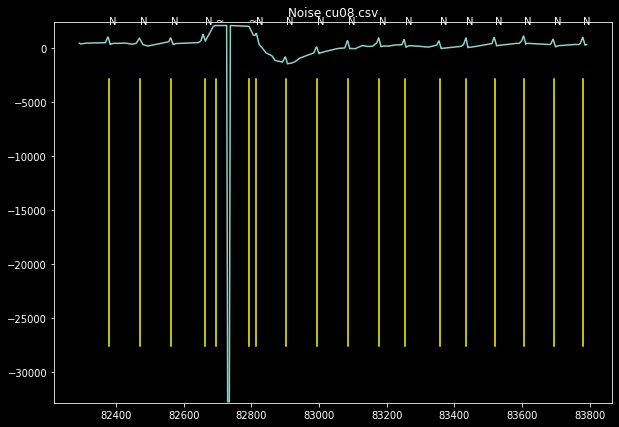

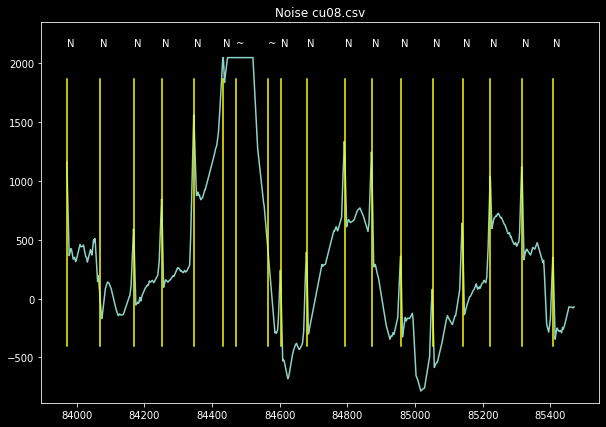

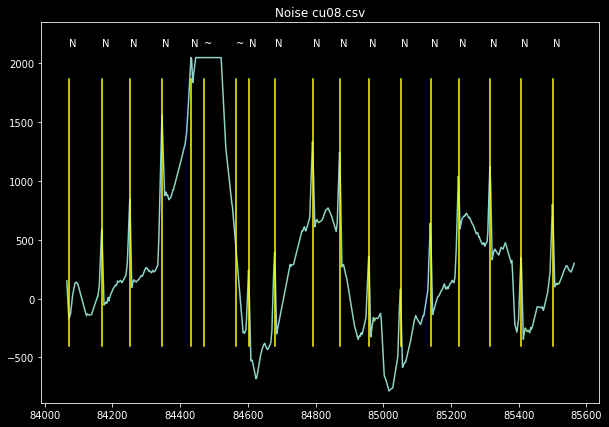

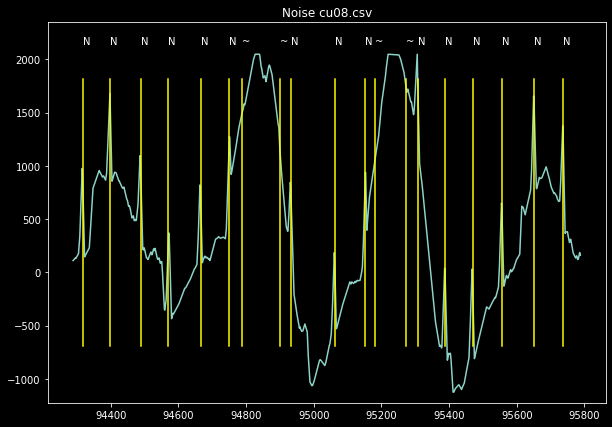

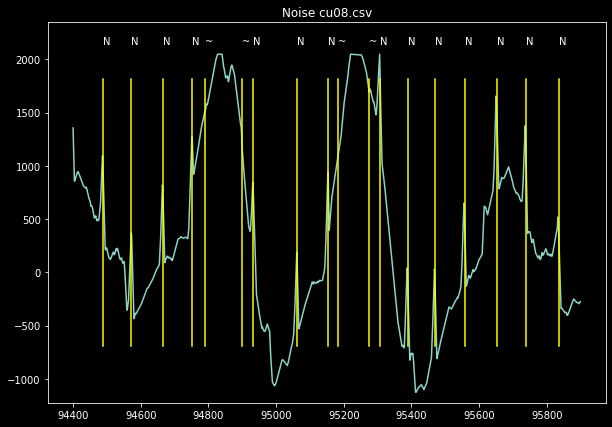

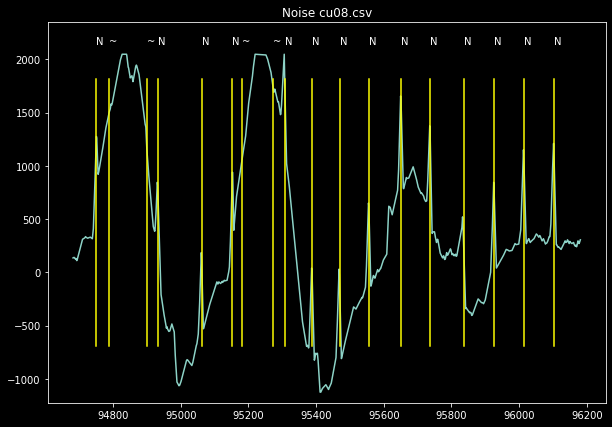

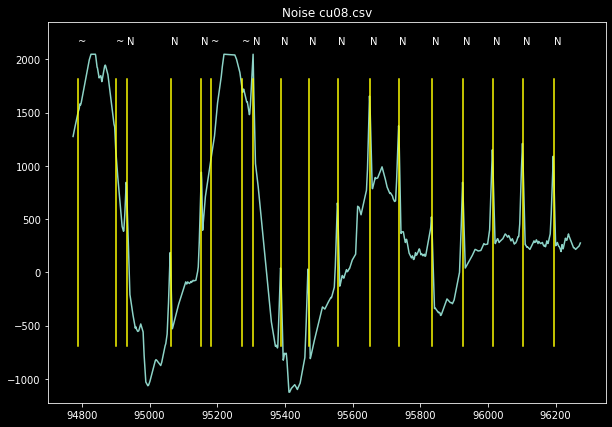

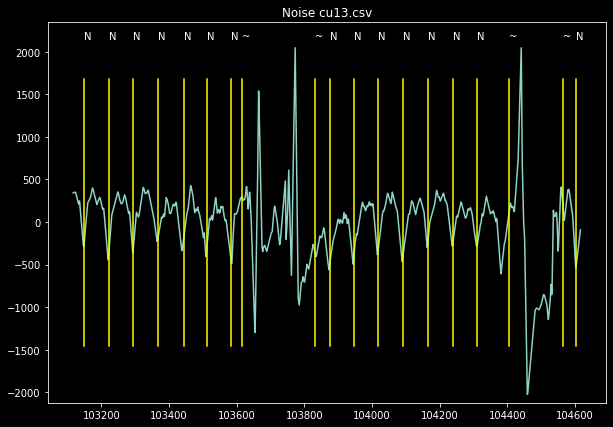

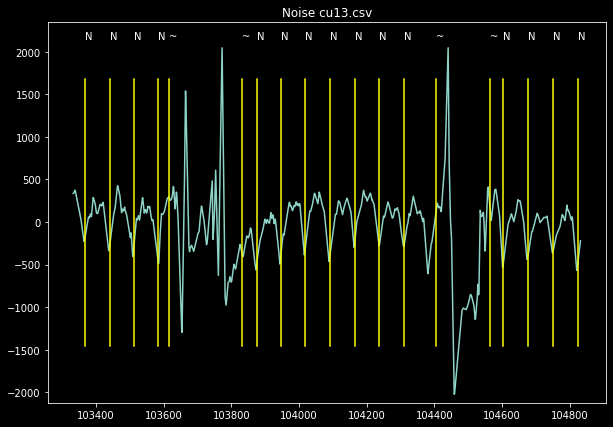

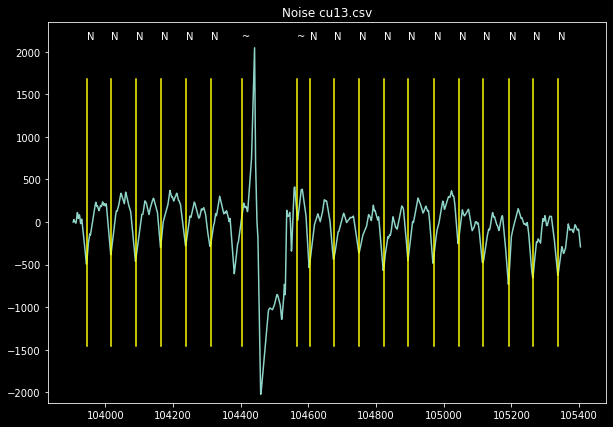

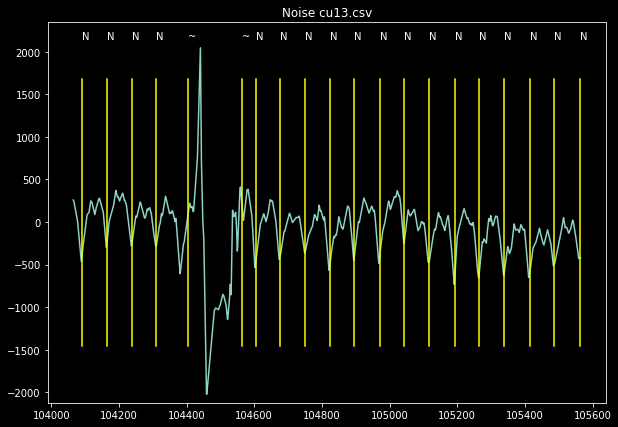

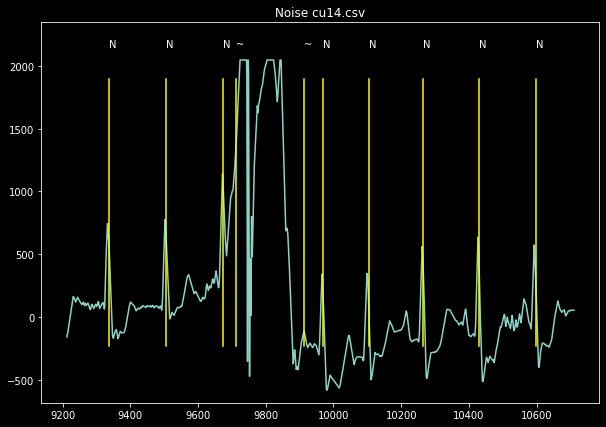

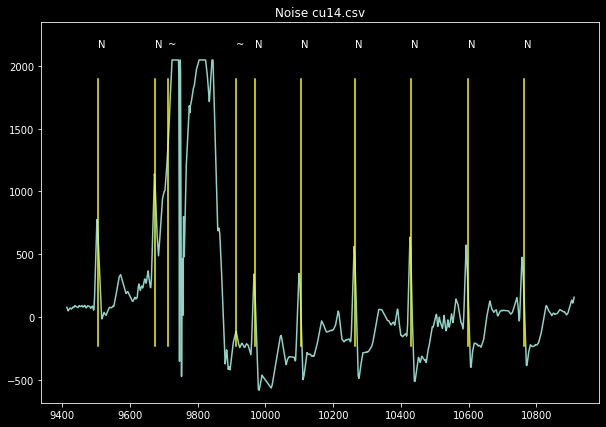

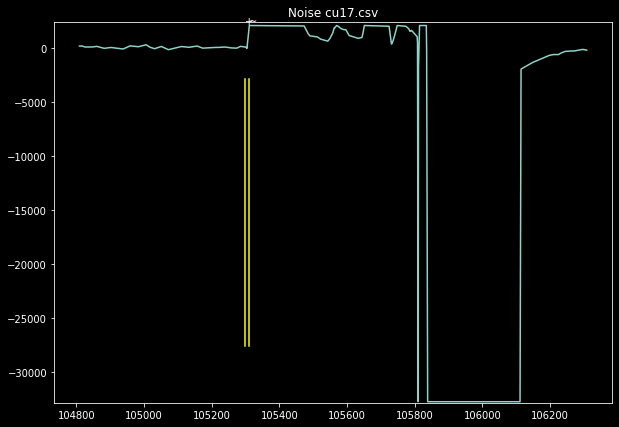

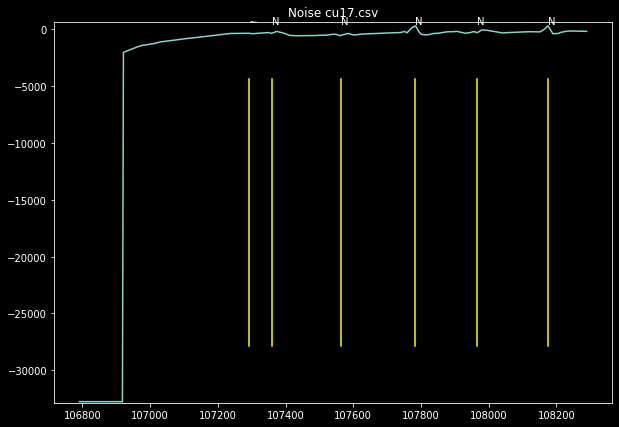

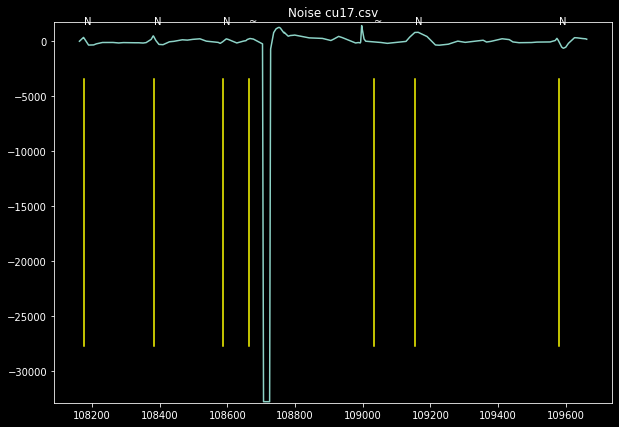

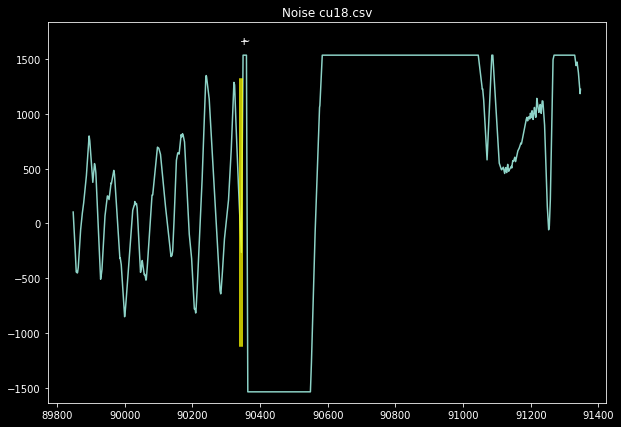

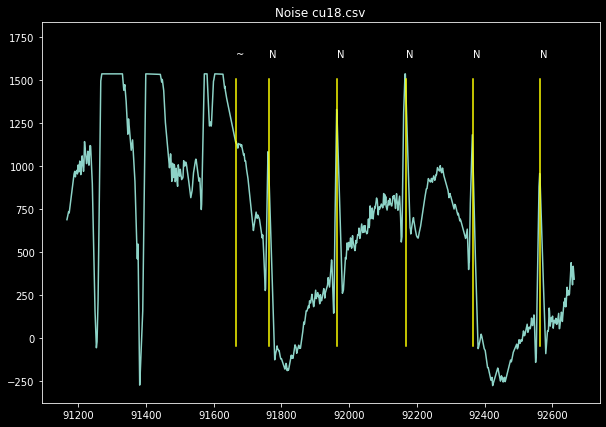

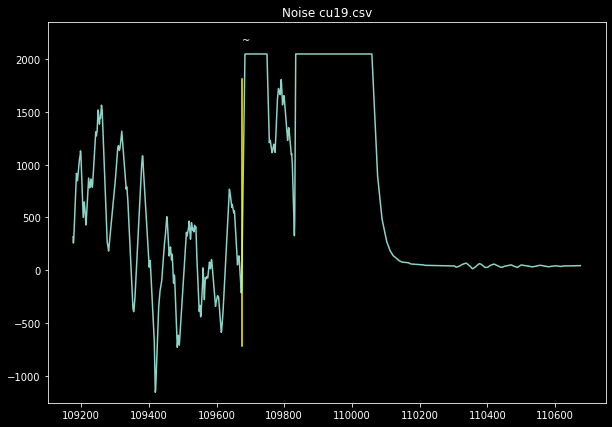

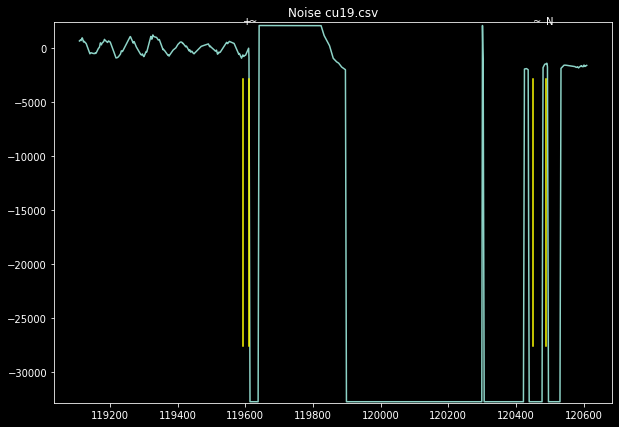

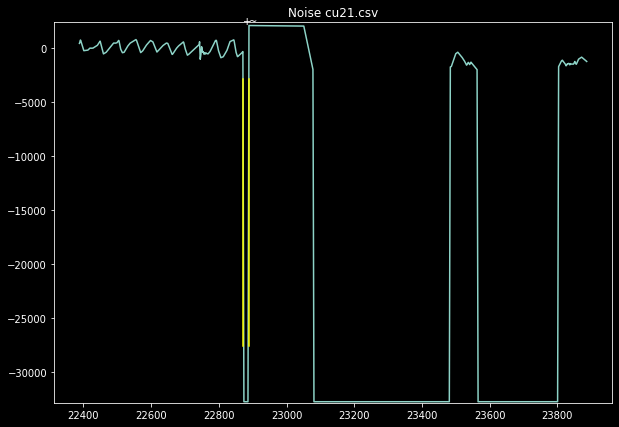

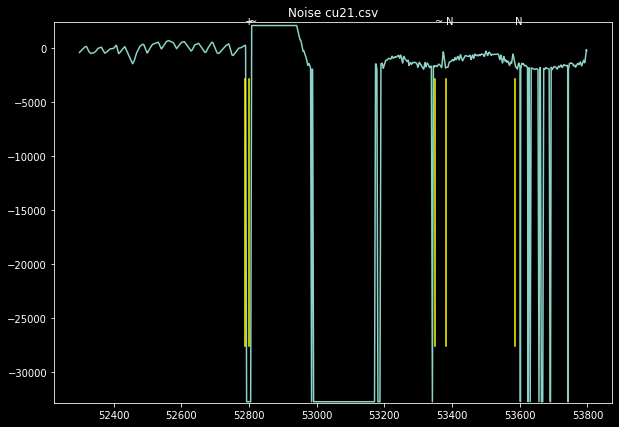

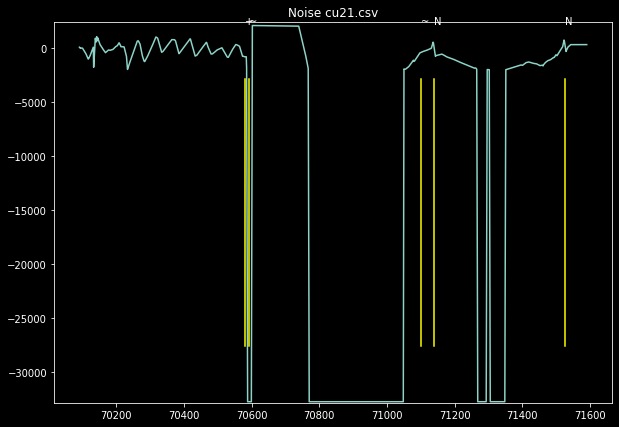

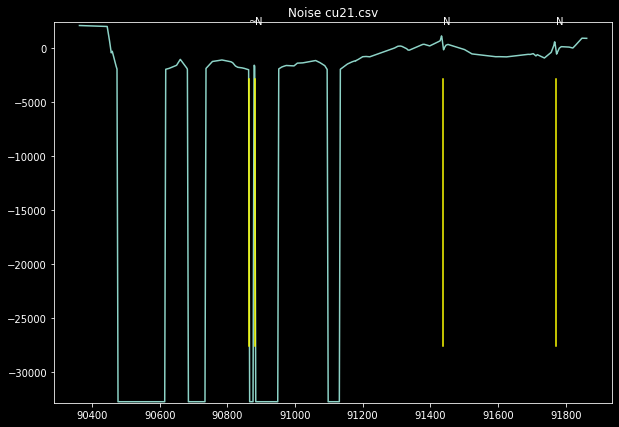

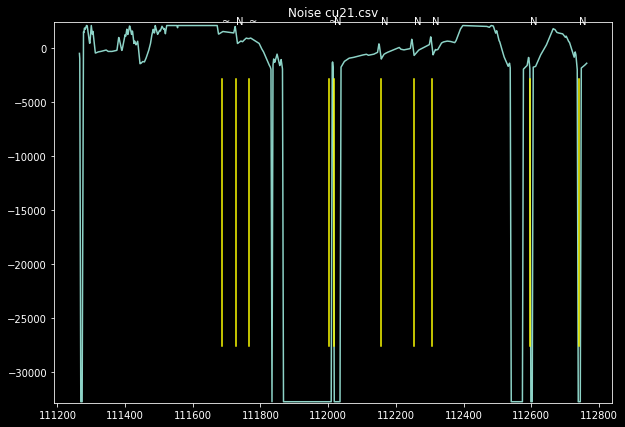

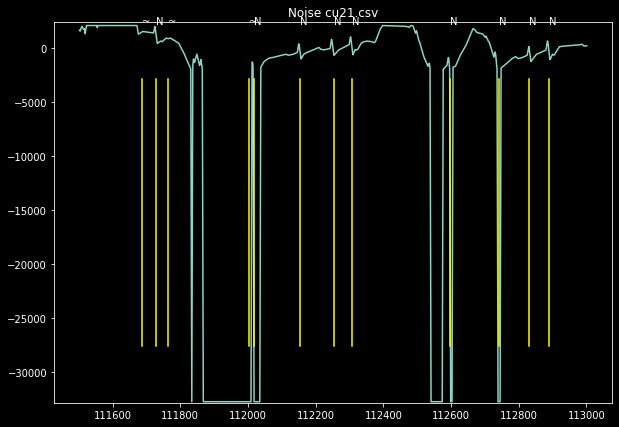

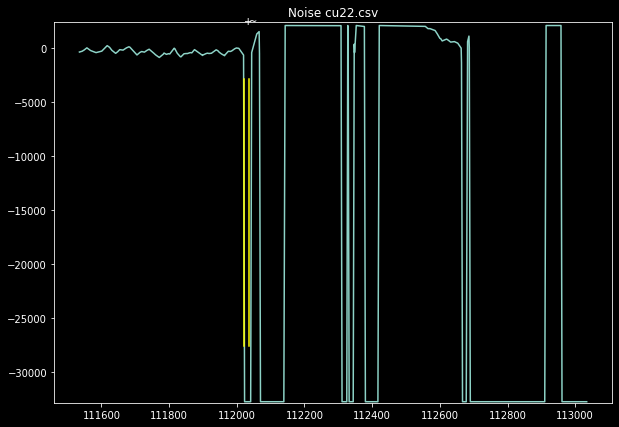

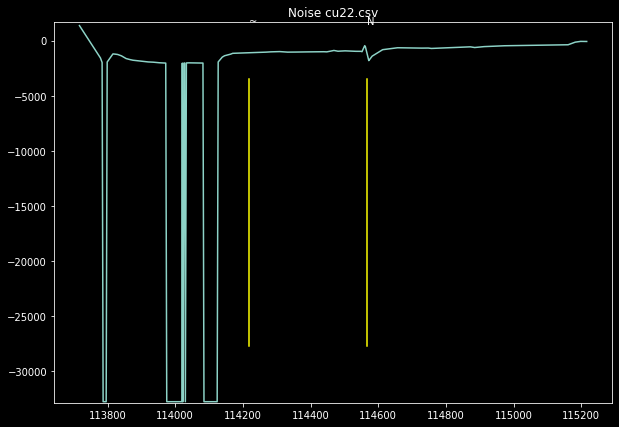

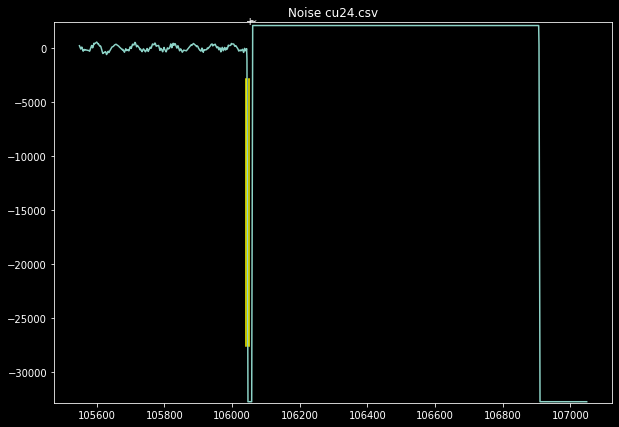

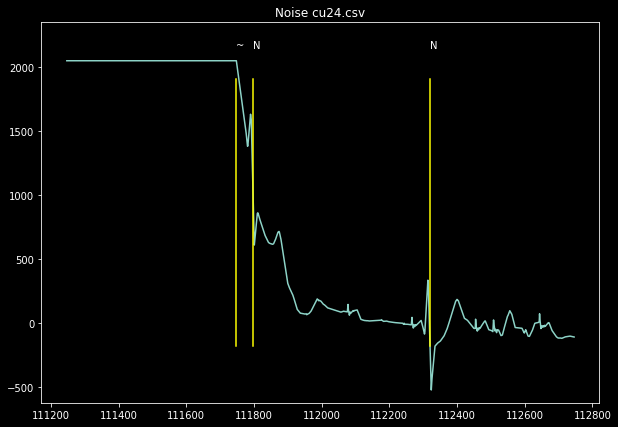

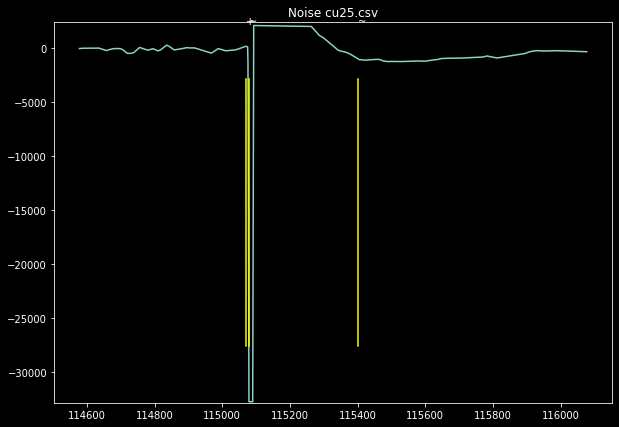

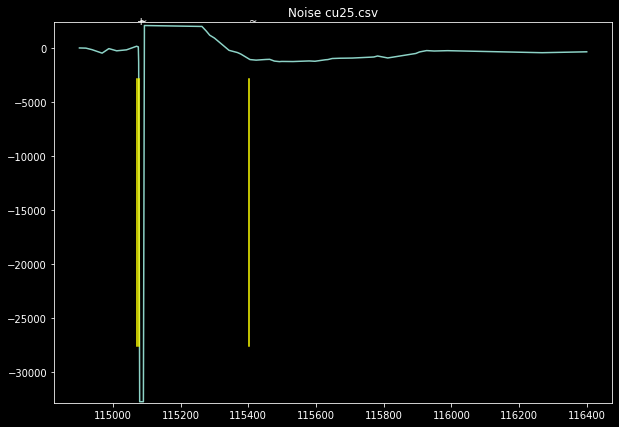

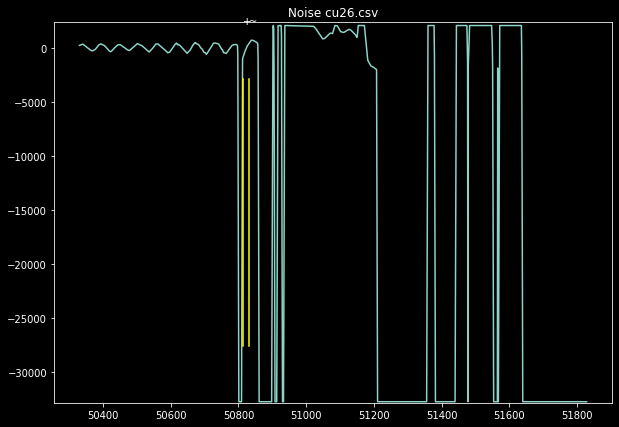

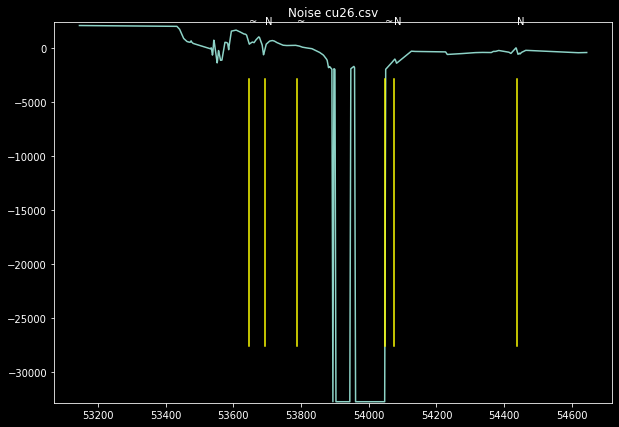

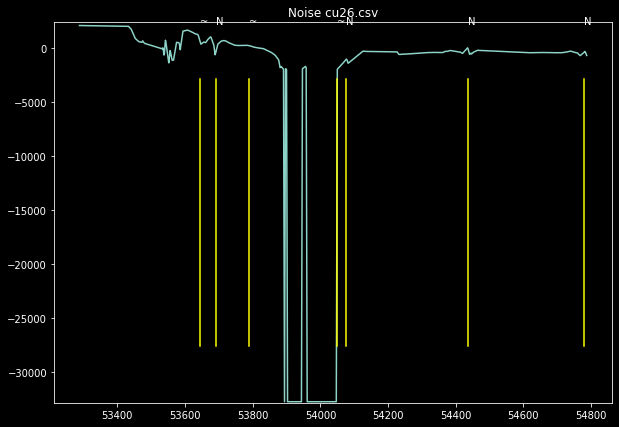

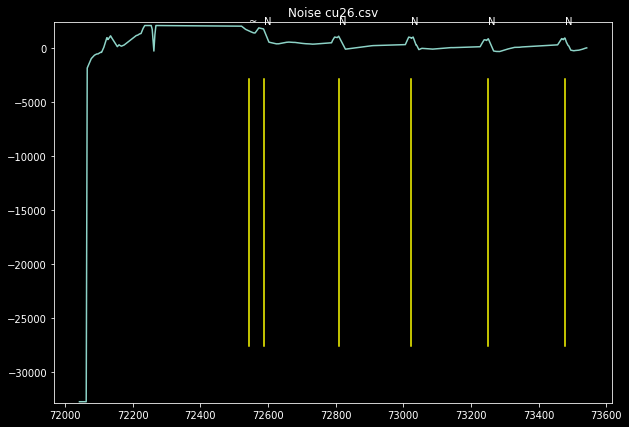

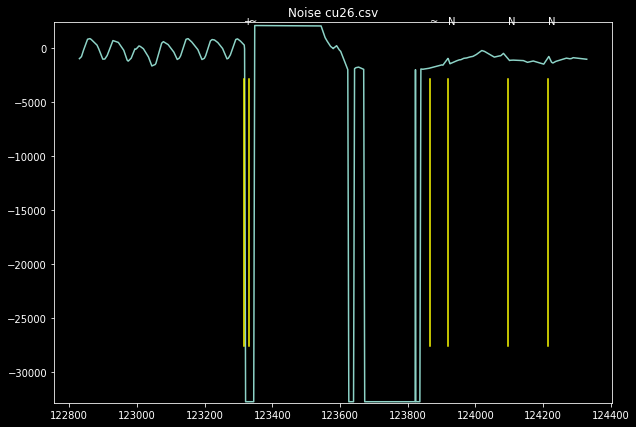

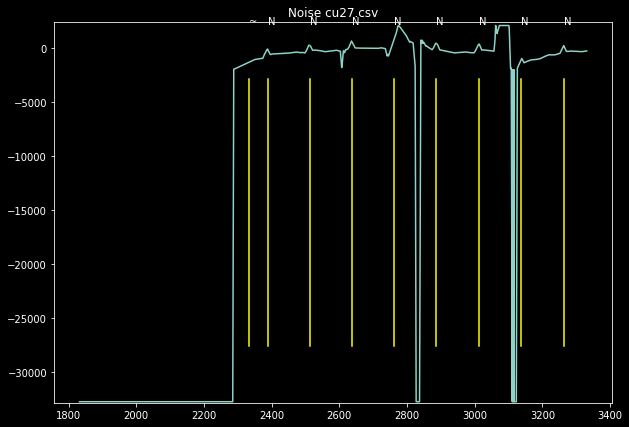

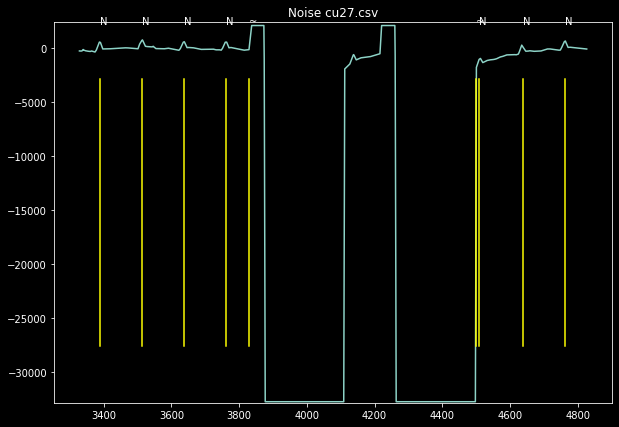

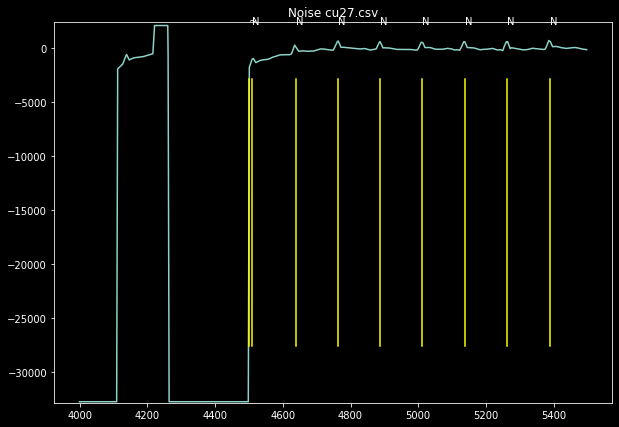

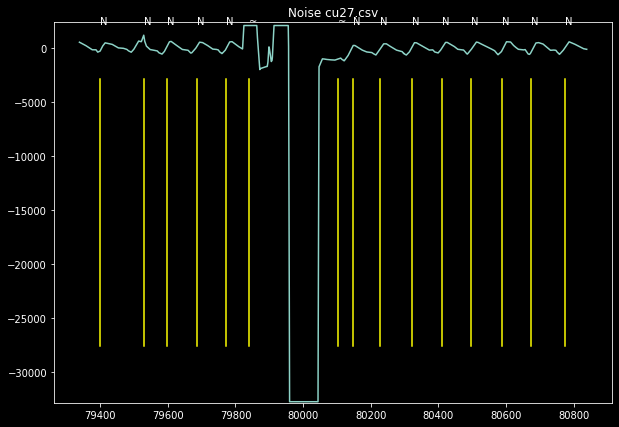

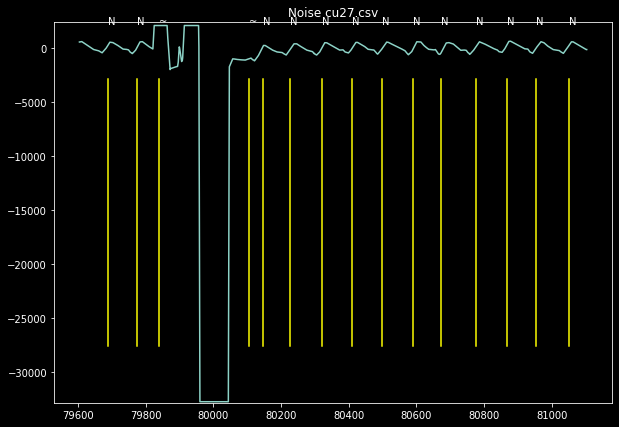

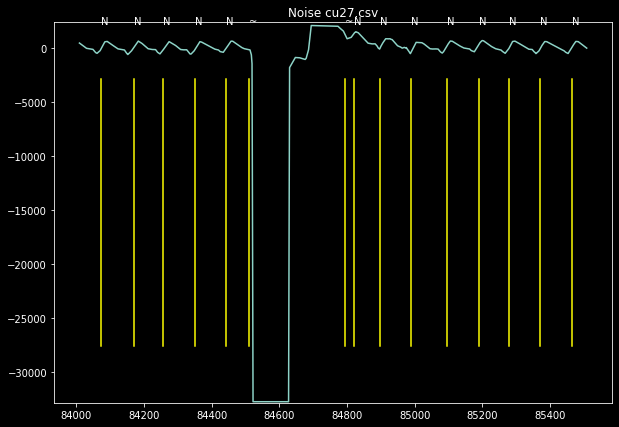

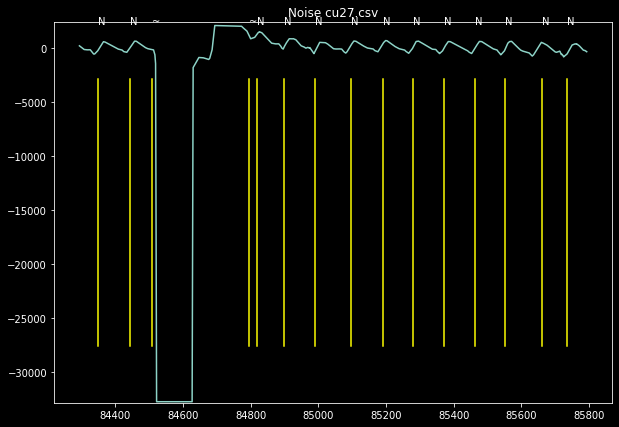

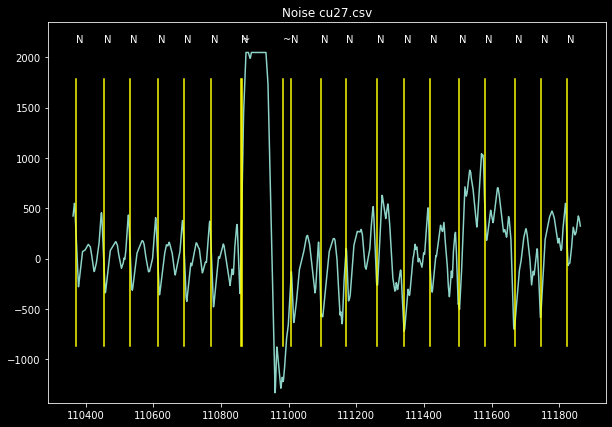

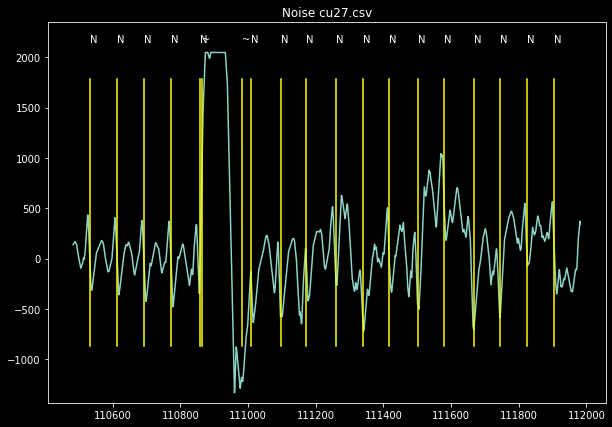

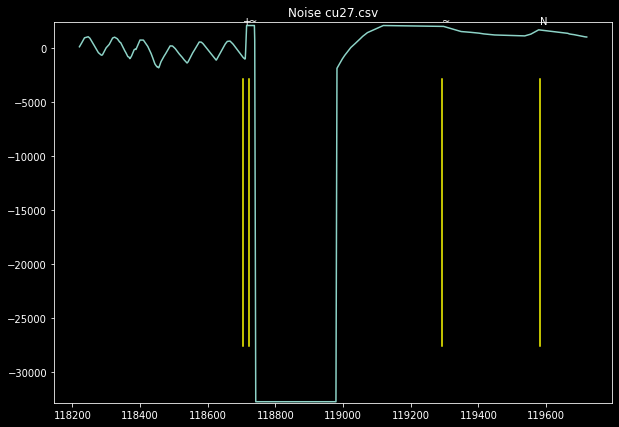

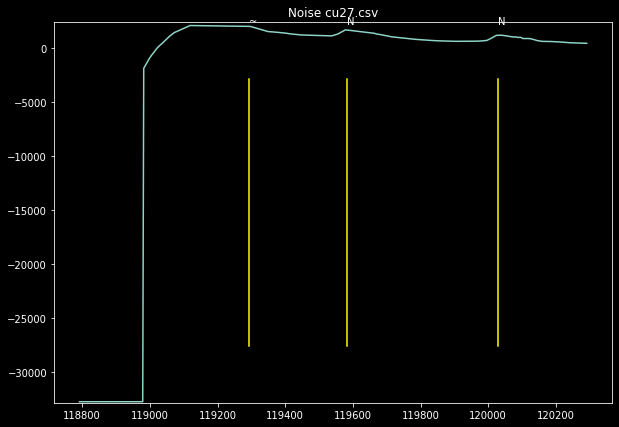

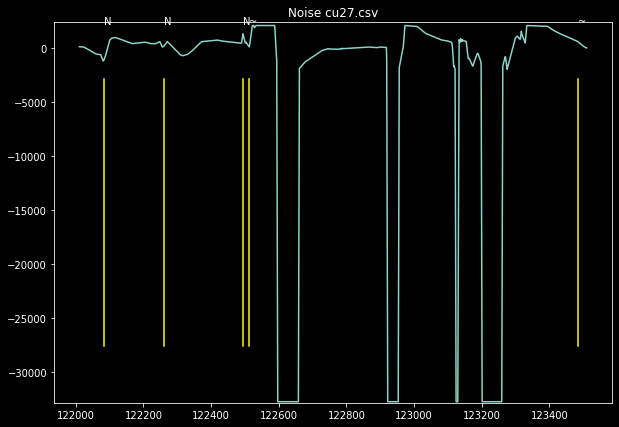

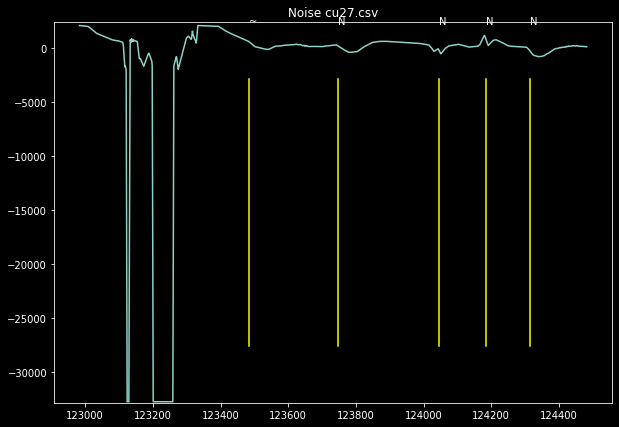

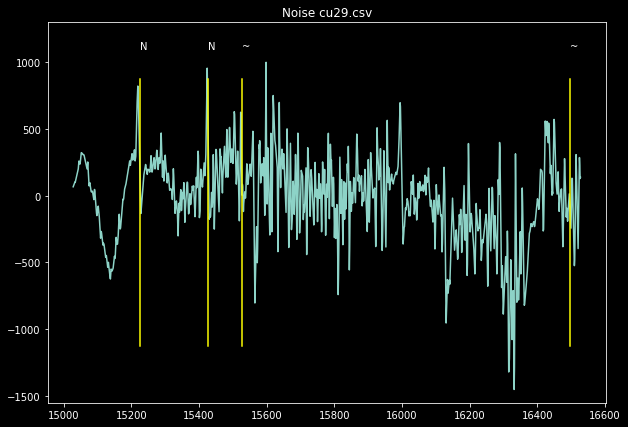

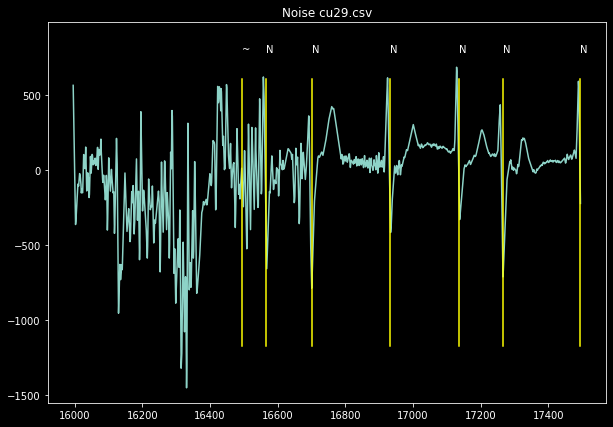

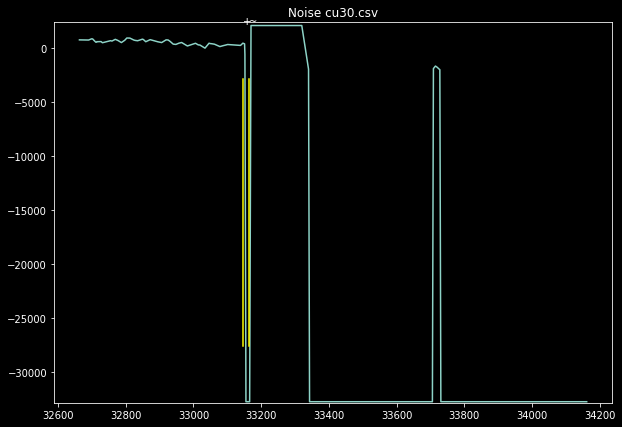

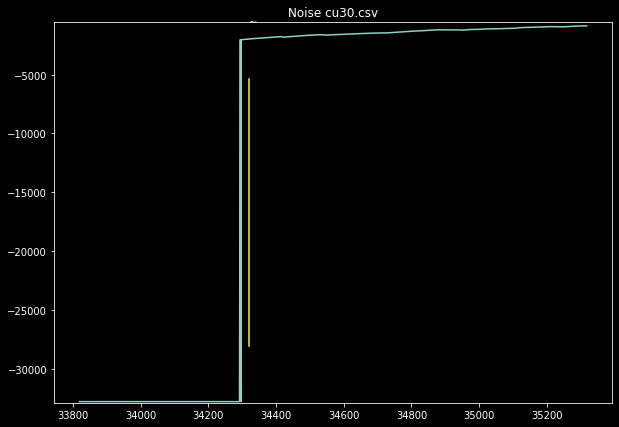

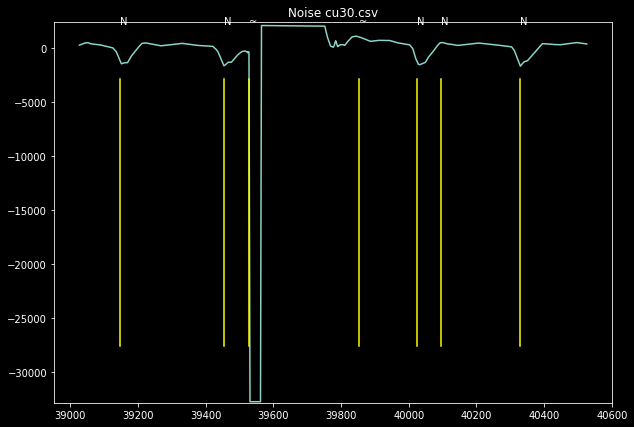

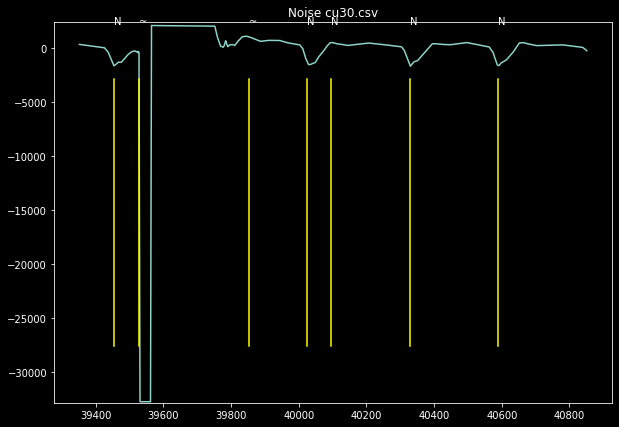

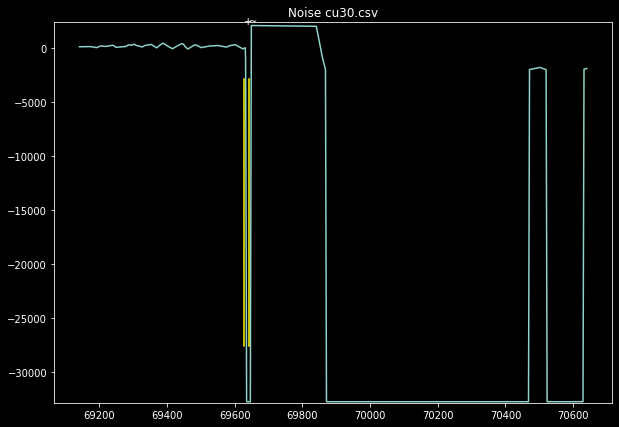

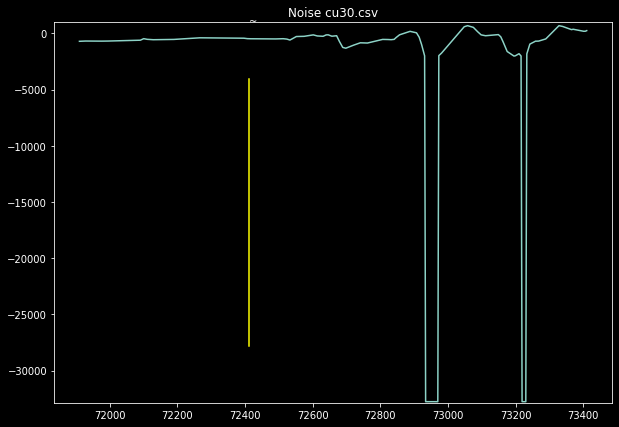

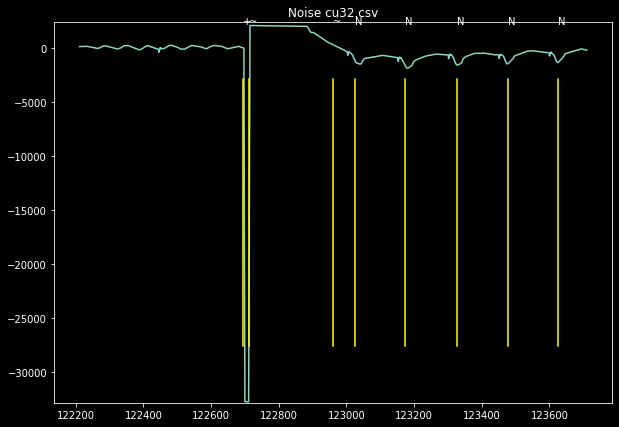

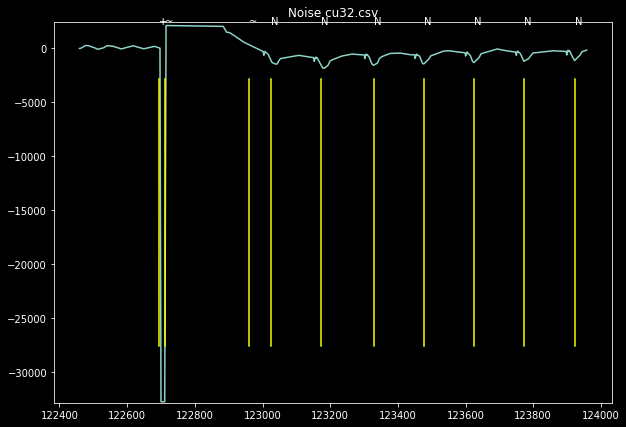

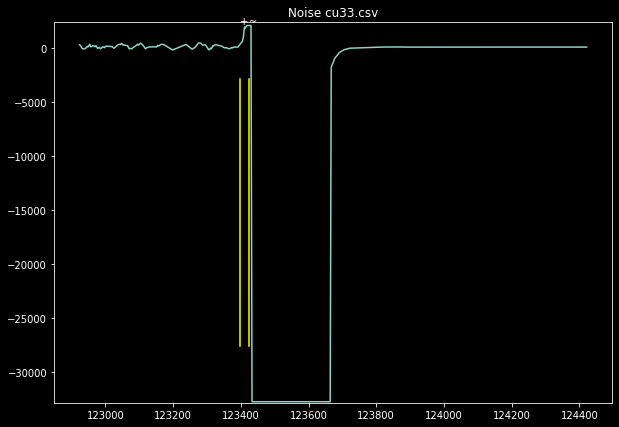

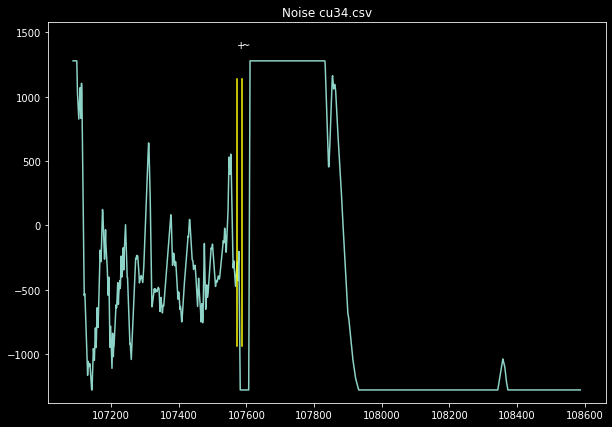

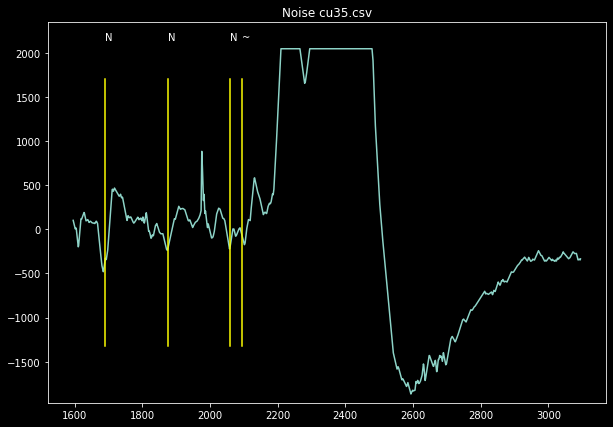

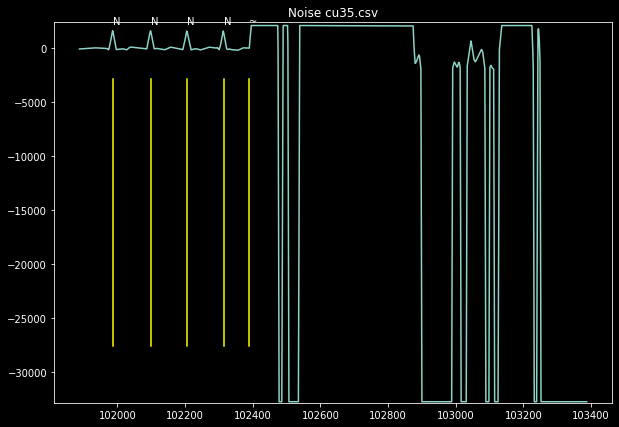

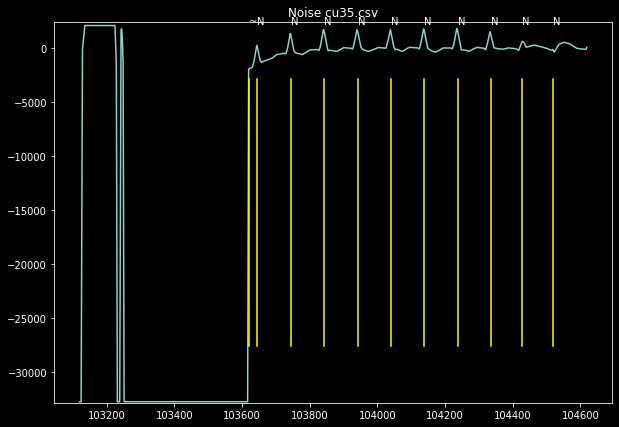

In [8]:
for file in os.listdir(ann_data_dir):
    file = str(file)

    ann_file = pd.read_csv(f'{ann_data_dir}\\{file}')
    samp_file = pd.read_csv(f'{samp_data_dir}\\{file}')
    samp_file.columns = ['sample_idx', 'ecg']

    noise_anns = ann_file[ann_file['beat'] == '~'].reset_index(drop = True)
    if noise_anns.shape[0] == 0: continue # if empty

    for noise_row_idx, noise_row in noise_anns.iterrows():

        # dataframe index is equivalent to sample idxs from samples file
        ecg_segment = samp_file.iloc[noise_row['sample_idx']-500:noise_row['sample_idx']+1000]
        if len(ecg_segment) == 0: continue
        plt.plot(ecg_segment['sample_idx'], ecg_segment['ecg'])

        next_beats = ann_file[
            (ann_file['sample_idx'] >= noise_row['sample_idx'] - 500) &
            (ann_file['sample_idx'] <= noise_row['sample_idx'] + 1000)
        ]

        for next_beat_idx, next_beat_row in next_beats.iterrows():

            plt.axvline(x=next_beat_row['sample_idx'],
                        ymin=0.15, ymax=0.85,
                        label=next_beat_row['beat'],
                        c = 'yellow')

            plt.annotate(text = next_beat_row['beat'],
                         xy = (next_beat_row['sample_idx'], ecg_segment['ecg'].max() + 100))


        plt.ylim((ecg_segment['ecg'].dropna().min() - 100, ecg_segment['ecg'].dropna().max() + 300))
        plt.title(f'Noise {file}')
        plt.savefig(f'{plots_save_dir}/{file.replace(".csv","")}_{noise_row["sample_idx"]}.pdf')
        plt.show()
        plt.close()

    # break